# Аналитика с применением ML. Обучение с учителем. Регрессия.
## Составить лучшие варианты бриллианта
<div style="text-align: center;">
    <img src="https://static.tildacdn.com/tild3336-3437-4638-b566-666236633564/unnamed_2.jpg" alt="Брилиант" width="400" height="400">
</div>

In [1]:
# Импортируем библиотеки
import pandas as pd # для работы с данными
import numpy as np # для вычислений
import matplotlib.pyplot as plt # для визулизаций
import seaborn as sns # для визулизаций

from sklearn import linear_model # Линейные модели
from sklearn import preprocessing # предобработка
from sklearn import metrics # метрики
from sklearn.model_selection import train_test_split # выборка
%matplotlib inline

Повторим, как организуется процесс разработки DS-проектов согласно методологии CRISP-DM.

Этапы модели CRISP-DM:
1. Анализ требований
2. Исследование данных
3. Подготовка данных
4. Моделирование
5. Оценка модели
6. Внедрение

### Анализ требований

Задание: Анализировать кейс и создать модель Регрессий для предсказывание цены бриланта.

**Знакомство с данными**

In [2]:
# Считываем данные из таблицы
df = pd.read_excel(r"C:\Users\moona\Desktop\Брилианты для Сары - project 5\data\data.xlsx")
df.set_index('ID', inplace=True) # устанавливаем колонку "ID" как индекс
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
ID,,,,,,,,
1,1.10,Ideal,H,SI1,VG,EX,GIA,5169
2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
3,0.85,Ideal,H,SI1,EX,EX,GIA,3183
4,0.91,Ideal,E,SI1,VG,VG,GIA,4370
5,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Каждый брилиант описывает следующие признаки:
1. Carat Weight - Вес в каратах
2. Cut - Огранка
3. Color - Цвет
4. Clarity - Чистота
5. Polish - Полировка
6. Symmetry - Симетрия
7. Report - Стандарты оценки
8. Price - Цена (**Целевая переменная**)

* Оценка брилиантов зависет от четерех основных критериев, известные как "Четыре С" - Carat Weight, Cut, Color, Clarity. Помимо этих факторов на стоимость камня могут также влиять другие, менее известные показатели, это - Polish, Symmetry, Report. (Подробно можете узнать в файле "task.pdf" в папке "description").

In [3]:
df.shape

(6000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 1 to 6000
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 421.9+ KB


### Исследование данных

Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

Выводим описательные статистики для числовых и категориальных признаков

In [5]:
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


In [6]:
df.describe(include='object')

,Cut,Color,Clarity,Polish,Symmetry,Report
count,6000,6000,6000,6000,6000,6000
unique,5,6,7,4,4,2
top,Ideal,G,SI1,EX,VG,GIA
freq,2482,1501,2059,2425,2417,5266


In [7]:
# создаем копию для облегчения работы с таблицей
temp_data = df.copy()

Проведем небольшое исследование зависимости целевого признака price от числовых признаков.

In [8]:
types = temp_data.dtypes
num_features = list(types[types != 'object'].index)
num_features

['Carat Weight', 'Price']

Покажем визуализацией диаграмму рассеяния для числовых признаков. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии.

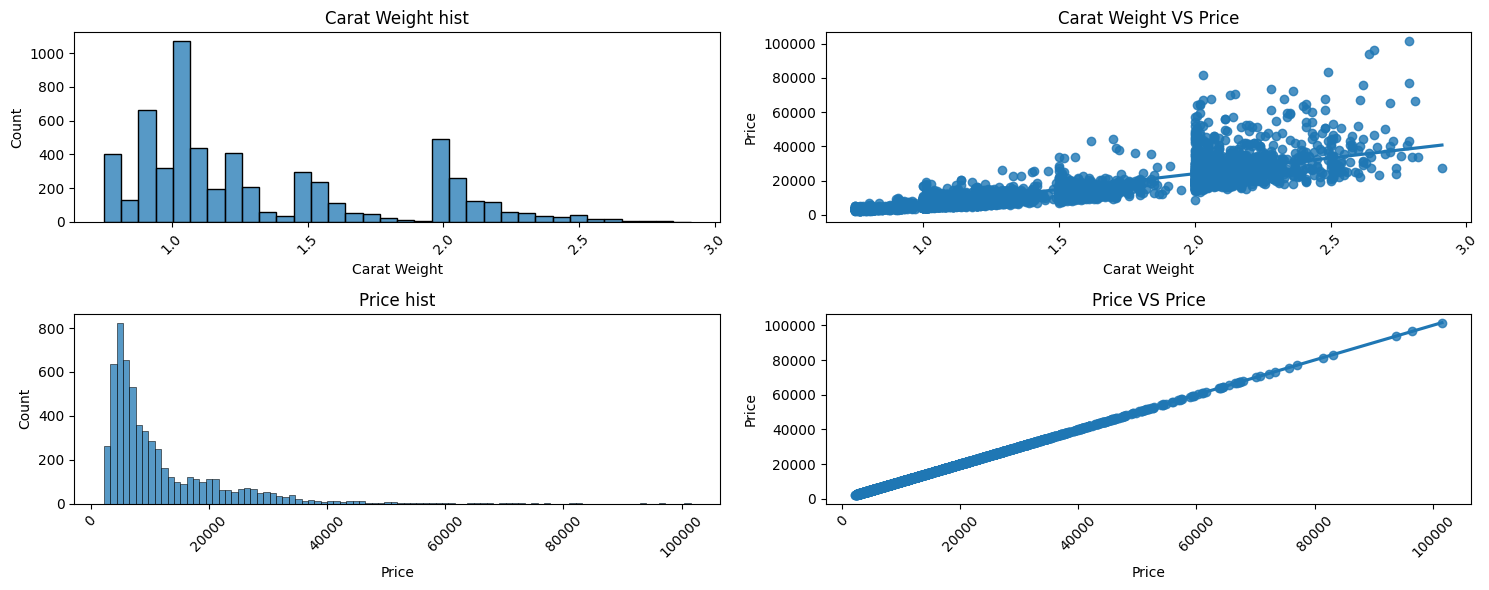

In [9]:
n = len(num_features) # количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 6))
for i, feature in enumerate(num_features):
    # Диаграмма рассеяния
    # Гистограмма рассейвания признака
    histplot = sns.histplot(data=temp_data, x = feature, ax=axes[i][0]) 
    # Подписываем
    histplot.set_title('{} hist'.format(feature))  
    # Поворот
    histplot.xaxis.set_tick_params(rotation=45)  
    
    # Диаграмма рассеяния + Уравнение регрессии
    # Уравнение регрессии отношение признака с целевой переменной
    regplot = sns.regplot(data=temp_data, x=feature, y='Price', ax=axes[i][1]) 
    # Подписываем
    regplot.set_title('{} VS Price'.format(feature)) 
    # Поворот
    regplot.xaxis.set_tick_params(rotation=45) 
plt.tight_layout() # выравнивание графиков

Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком (price)

<Axes: >

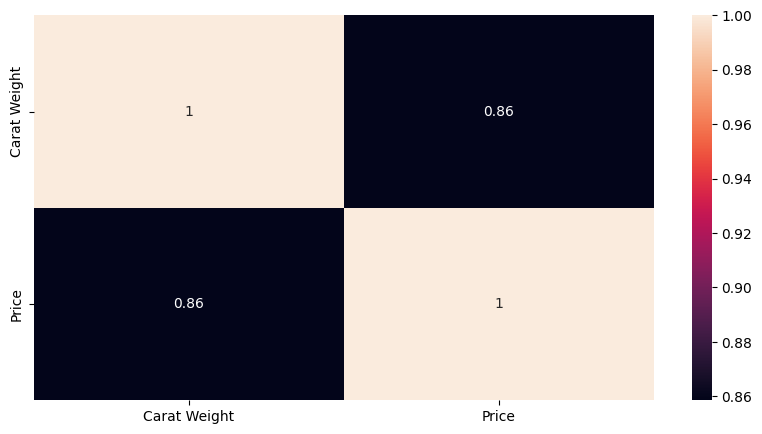

In [10]:
# Строим тепловую карту корреляций
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(temp_data[num_features].corr(), annot=True)

### Подготовка данных

Цель этого этапа — подготовить обучающую выборку для использования в моделировании.

Модель: Регрессия

**Задачи:**
- Анализ дубликатов
- Анализ пустот
- Удаление выбросов
- Обработать числовые метрики
- Обработать категориальные метрики
- Удаление лишних переменных / уменьшение размерности

#### Анализ дубликатов

Выводим дубликаты с помощью функции duplicated() и удаляем их функцией drop_duplicates().

In [15]:
# Выводим дубликаты
temp_data[temp_data.duplicated()].shape

(83, 8)

In [20]:
# Удаляем дубликаты 
temp_data.drop_duplicates(inplace=True)
temp_data.shape

(5917, 8)

Были удалены 83 строк данных которые были дубликатами.

#### Анализ пустот

Для анализа пустот в данных используем isna()

In [22]:
# Выводим количество пустых ячеек из каждой колонки нашего датасета 
temp_data.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

Пустые ячейки отсутствуют.

#### Удаление выбросов

Моя цель анализировать и удалить выбросы Целевой переменны('Price'), но у нас есть проблема в том что распределение не семетрично. Можете посмотреть решение проблемы внизу.

1 - Есть большие выбросы, ввиде длинного хвоста.

Из-за этого центральным значением выбираем медиану, а не среднюю. Потому что она не чуствительна к выбросам.

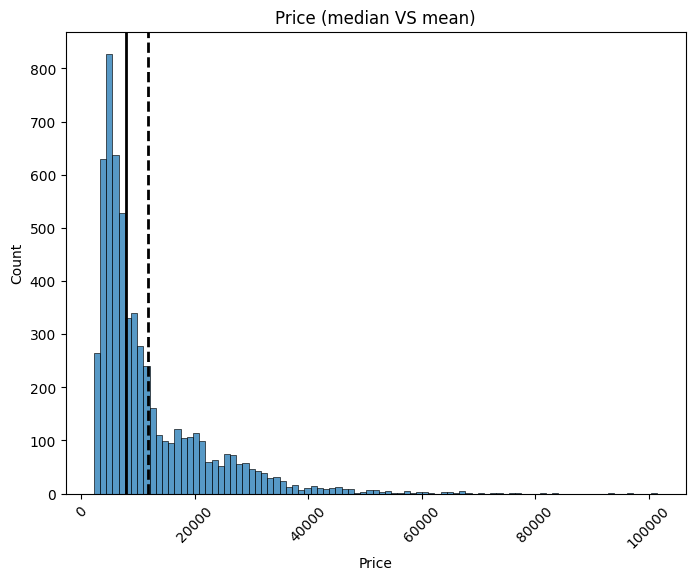

In [35]:
# Визуализируем разницу между медианой и средним
fig, _ = plt.subplots(1, 1, figsize=(8, 6))
histplot = sns.histplot(data=temp_data, x = 'Price')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Price (median VS mean)')
_.axvline(temp_data['Price'].median(), color='k', lw=2)
_.axvline(temp_data['Price'].mean(), color='k', ls='--', lw=2)

А так же можно увидеть что медиана и 50 персентиль одинаковы.

In [38]:
# Медиана и 50 персентиль целевой переменны
print("Median = {}".format(temp_data['Price'].median()))
print("50 % = {}".format(np.percentile(temp_data['Price'], 50)))

Median = 7869.0
50 % = 7869.0


2 - Распределение не семетрично. Так что мы не можем использовать метод z-отклонений(3х сигм).

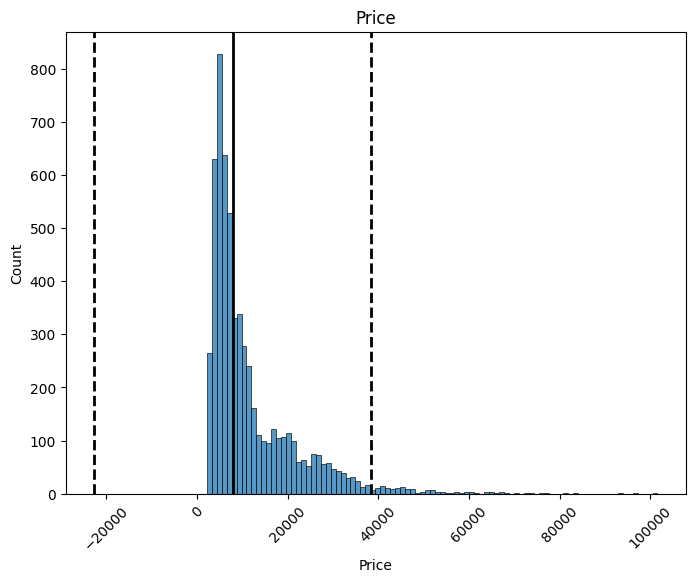

In [40]:
# Визуализация ошибку по поводу 3 сигм.
fig, _ = plt.subplots(1, 1, figsize=(8, 6))
histplot = sns.histplot(data=temp_data, x = 'Price')
histplot.xaxis.set_tick_params(rotation=45)
histplot.set_title('Price')
_.axvline(temp_data['Price'].median(), color='k', lw=2)
_.axvline(temp_data['Price'].median() + 3*temp_data['Price'].std(), 
          color='k', ls='--', lw=2)
_.axvline(temp_data['Price'].median() - 3*temp_data['Price'].std(), 
          color='k', ls='--', lw=2)

Здесь я хочу использовать **"Скорректированный интервал"**. 

Решение этой проблемы предложили Миа Хаберт и Елена Вандервирен (Mia Hubert and Ellen Vandervieren) в 2007 г. в статье “An Adjusted Boxplot for Skewed Distributions”. Их идея заключается в вычислении границ “интервал доверия” с учетом асимметрии распределения, но чтобы для симметричного случая он был равен всё тому же 1,5 * IQR.

Чтобы это сделать надо:
- Вычислить медиану и межквартильный размах (IQR) данных.
- Вычислить нижнюю и верхнюю границы интервала.
- Обнаружить выбросы, которые находятся за пределами этих границ.

Границы для удаления выбросов вычисляются следующим образом:
